<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/2_Mnist_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries

In [57]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [58]:
fashion_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Explore data

In [59]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [60]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


## Preprocess Data / Normalization

In [61]:
train_images = train_images / 255.0

test_images = test_images / 255.0

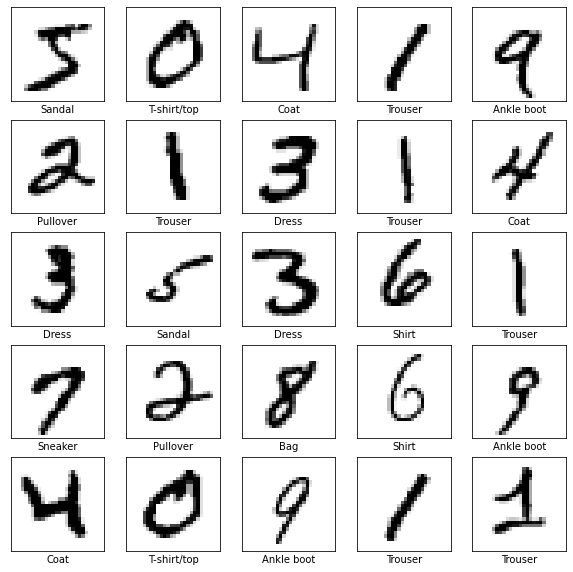

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the Model

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the Model

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the Model

In [65]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4183 - accuracy: 0.8824
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1199 - accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0425 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0253 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

## Predict Output

In [66]:
predictions = model.predict(test_images)

In [75]:
predictions[0]

array([4.0816356e-12, 6.1903178e-12, 9.2821580e-08, 1.3957772e-06,
       1.0465196e-14, 1.6469303e-11, 1.7418769e-17, 9.9999833e-01,
       1.9751389e-09, 1.8640947e-07], dtype=float32)

In [76]:
np.argmax(predictions[0])

7

In [77]:
test_labels[0]

7

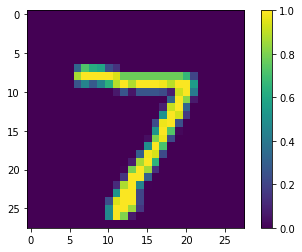

In [78]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()